In [1]:
root_folder = %pwd

import os

import numpy as np
import obspy

from synthacc.recordings import Seismogram, Recording, Accelerogram
from synthacc.response import ResponseSpectrum, plot_response_spectra

In [2]:
s_brea = obspy.read(os.path.join(root_folder, 'data', 'Kinrooi', 'CN027_BREA-02761.evt'))
s_masa = obspy.read(os.path.join(root_folder, 'data', 'Kinrooi', 'BU009_MASA-02755.evt'))

In [3]:
s_brea.detrend('linear')
s_masa.detrend('linear')

3 Trace(s) in Stream:
.MASA..0 | 2018-05-25T22:43:24.000000Z - 2018-05-25T22:43:53.996000Z | 250.0 Hz, 7500 samples
.MASA..1 | 2018-05-25T22:43:24.000000Z - 2018-05-25T22:43:53.996000Z | 250.0 Hz, 7500 samples
.MASA..2 | 2018-05-25T22:43:24.000000Z - 2018-05-25T22:43:53.996000Z | 250.0 Hz, 7500 samples

In [4]:
unit = 'm/s2'

brea_e = Seismogram.from_trace(s_brea[0], unit=unit)
brea_n = Seismogram.from_trace(s_brea[1], unit=unit)
brea_z = Seismogram.from_trace(s_brea[2], unit=unit)

masa_e = Seismogram.from_trace(s_masa[0], unit=unit)
masa_n = Seismogram.from_trace(s_masa[1], unit=unit)
masa_z = Seismogram.from_trace(s_masa[2], unit=unit)

brea = Recording({'Z': brea_z,'E': brea_e, 'N': brea_n})
masa = Recording({'Z': masa_z,'E': masa_e, 'N': masa_n})

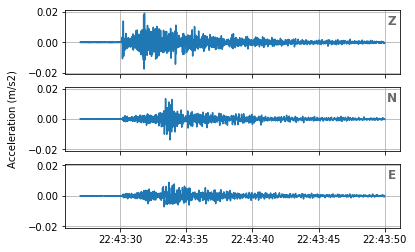

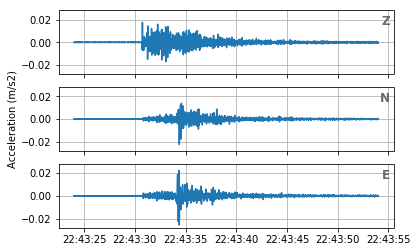

In [5]:
brea.plot()
masa.plot()

In [6]:
periods = np.logspace(-2, 0, 200)

brea_n_acc = Accelerogram.from_seismogram(brea.get_component('N'))
masa_e_acc = Accelerogram.from_seismogram(masa.get_component('E'))

brea_n_rs = brea_n_acc.get_response_spectrum(periods)
masa_e_rs = masa_e_acc.get_response_spectrum(periods)

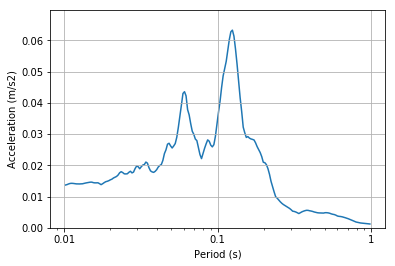

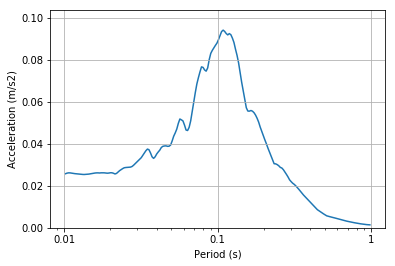

In [7]:
brea_n_rs.plot()
masa_e_rs.plot()

In [8]:
data_brea = np.loadtxt(os.path.join(root_folder, 'data', 'Kinrooi', 'Kinrooi_BREA_rs.csv'), skiprows=1)
data_masa = np.loadtxt(os.path.join(root_folder, 'data', 'Kinrooi', 'Kinrooi_MASA_rs.csv'), skiprows=1)

In [9]:
periods, indices = np.unique(data_brea[:,0], return_index=True)
responses = data_brea[:,1][indices]
rs_brea = ResponseSpectrum(periods, responses, unit='m/s2', damping=0.05)

periods, indices = np.unique(data_masa[:,0], return_index=True)
responses = data_masa[:,1][indices]
rs_masa = ResponseSpectrum(periods, responses, unit='m/s2', damping=0.05)

In [10]:
data_brea2 = np.loadtxt(os.path.join(root_folder, 'data', 'Kinrooi', 'Kinrooi_BREA_rs_pc=BJ1984.csv'), skiprows=1, delimiter=',')
periods, indices = np.unique(data_brea2[:,0], return_index=True)
responses = data_brea2[:,1][indices]
rs_brea2 = ResponseSpectrum(periods, responses, unit='m/s2', damping=0.05)

data_masa2 = np.loadtxt(os.path.join(root_folder, 'data', 'Kinrooi', 'Kinrooi_MASA_rs_pc=BJ1984.csv'), skiprows=1, delimiter=',')
periods, indices = np.unique(data_masa2[:,0], return_index=True)
responses = data_masa2[:,1][indices]
rs_masa2 = ResponseSpectrum(periods, responses, unit='m/s2', damping=0.05)

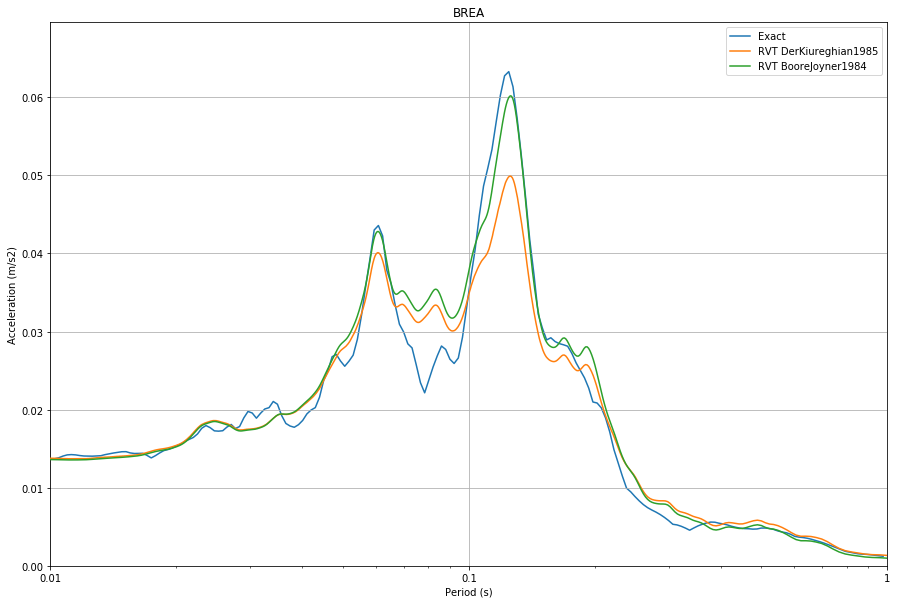

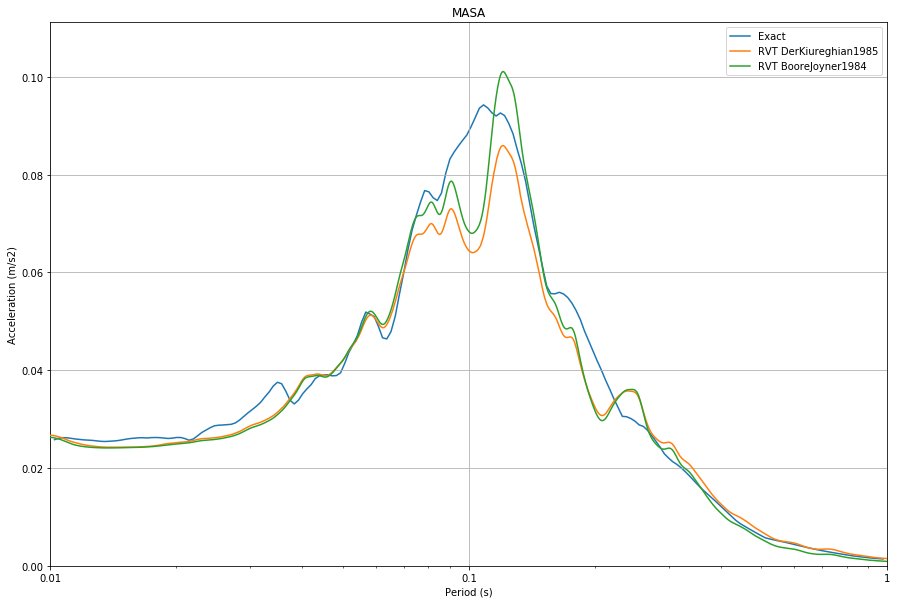

In [11]:
plot_response_spectra([brea_n_rs, rs_brea, rs_brea2], labels=['Exact', 'RVT DerKiureghian1985', 'RVT BooreJoyner1984'], title='BREA', size=(15, 10), min_period=0.01, max_period=1)
plot_response_spectra([masa_e_rs, rs_masa, rs_masa2], labels=['Exact', 'RVT DerKiureghian1985', 'RVT BooreJoyner1984'], title='MASA', size=(15, 10), min_period=0.01, max_period=1)

In [12]:
from synthacc.response import NewmarkBetaRC, NigamJenningsRC


nb_calc, nj_calc = NewmarkBetaRC(), NigamJenningsRC()

periods = np.logspace(-2, 0, 200)

nb_brea = nb_calc.get_response_spectrum(brea_n_acc, periods)
nj_brea = nj_calc.get_response_spectrum(brea_n_acc, periods)

nb_masa = nb_calc.get_response_spectrum(masa_e_acc, periods)
nj_masa = nj_calc.get_response_spectrum(masa_e_acc, periods)

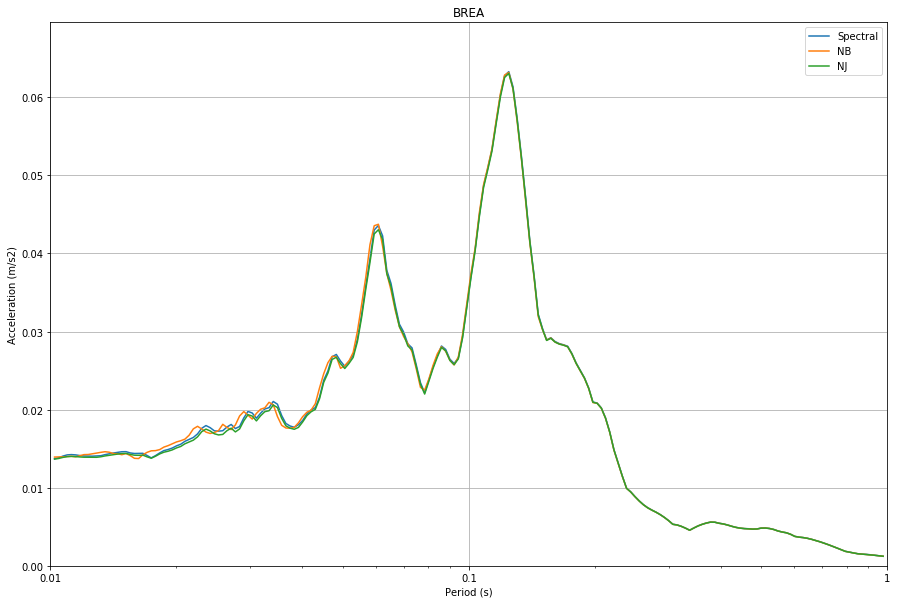

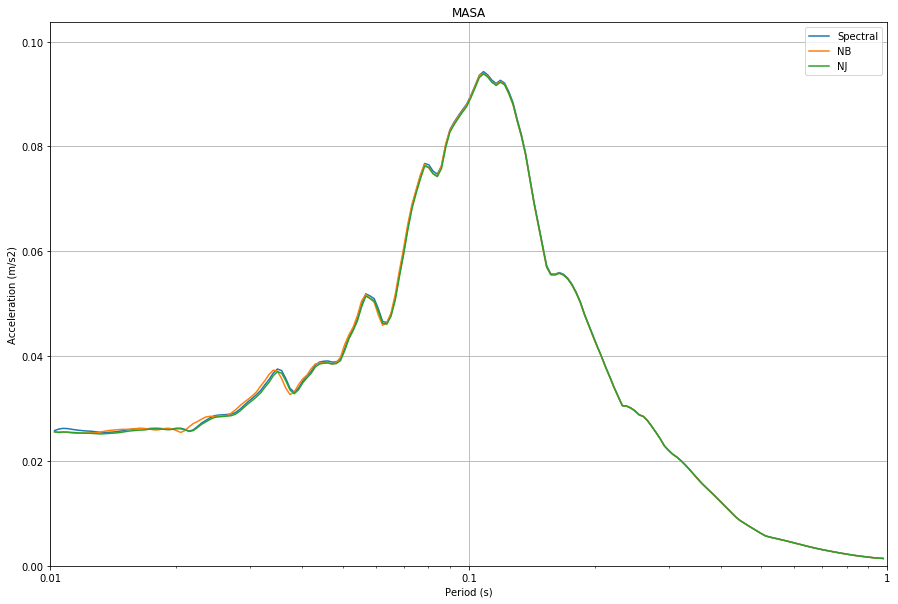

In [13]:
plot_response_spectra([brea_n_rs, nb_brea, nj_brea], labels=['Spectral', 'NB', 'NJ'], title='BREA', size=(15, 10), min_period=0.01, max_period=1)
plot_response_spectra([masa_e_rs, nb_masa, nj_masa], labels=['Spectral', 'NB', 'NJ'], title='MASA', size=(15, 10), min_period=0.01, max_period=1)